# Part I - Data Science Salaries Exploration
## by Dennis

## Introduction
> The dataset I am using has data on data science salaries, comparing variables like sex, country, title, remote_ratio, etc. between 2020 and 2022.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

Dataset link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [2]:
df = pd.read_csv("ds_salaries.csv", index_col=0)
df.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1               JP            S  
2               GB            M  
3               HN            S  
4               US            L

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
work_year             607 non-null int64
experience_level      607 non-null object
employment_type       607 non-null object
job_title             607 non-null object
salary                607 non-null int64
salary_currency       607 non-null object
salary_in_usd         607 non-null int64
employee_residence    607 non-null object
remote_ratio          607 non-null int64
company_location      607 non-null object
company_size          607 non-null object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [8]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count   607.000000  6.070000e+02     607.000000     607.00000
mean   2021.405272  3.240001e+05  112297.869852      70.92257
std       0.692133  1.544357e+06   70957.259411      40.70913
min    2020.000000  4.000000e+03    2859.000000       0.00000
25%    2021.000000  7.000000e+04   62726.000000      50.00000
50%    2022.000000  1.150000e+05  101570.000000     100.00000
75%    2022.000000  1.650000e+05  150000.000000     100.00000
max    2022.000000  3.040000e+07  600000.000000     100.00000

In [9]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df.shape

(607, 11)

### What is the structure of your dataset?

> The data is 607,11 in shape.

> Experience Level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director.

> Employment Type: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance.

> Company Size: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large).

### What is/are the main feature(s) of interest in your dataset?

> The main feature should be "salary".

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that should help are: Experience Level, Employee Residence, Employment Type, Job Title and Company Location/Size.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### Visualization 1: Salary

#### Question: 
How is the salary distributed, are there any outliers?

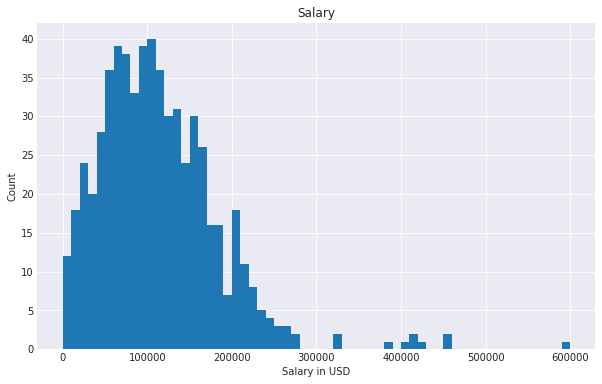

In [15]:
plt.figure(figsize=(10,6))
bins = np.arange(0, df["salary_in_usd"].max()+10000, 10000)
plt.hist(data=df, x="salary_in_usd", bins=bins)
#plt.xlim(0, 300000)
plt.xlabel("Salary in USD")
plt.ylabel("Count")
plt.title("Salary");

#### Observation: 
The main peak is between 50k to 150k with a another small peak in the 400k to 450k range and a few outliers to the right.

### Visualization 2: Experience Level

#### Question: 
How is the experience level distributed?

In [23]:
base_color = sns.color_palette()[0]

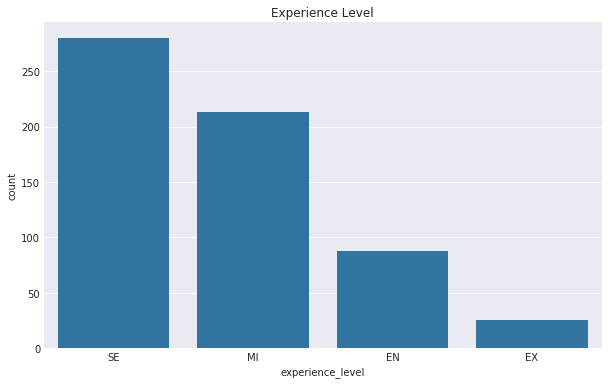

In [34]:
plt.figure(figsize=(10,6))
el_sorted = df["experience_level"].value_counts().index
sns.countplot(data=df, x="experience_level", order=el_sorted, color=base_color)
plt.title("Experience Level");

#### Observation: 
Interestingly enough there are a lot of senior employees in this dataset, followed by mid level employees. This could explain the high salaries we saw before. Also the few Experts that are here could be responsible for the outliers we found in the salary visualization.

### Visualization 3: Employee Residence

#### Question: 
Where do the employees live?

In [78]:
# Subset because there were many countries that had <5 employees which made the plot overcrowded
countries = df["employee_residence"].value_counts()
countries_subset = countries[countries > 5].index

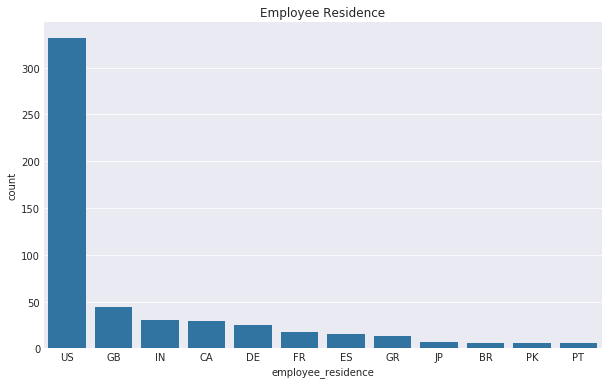

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="employee_residence", order=countries_subset, color=base_color)
plt.title("Employee Residence");

#### Observation: 
Over 50% of the employees are living in the US, while all other countries have <50 employees. 

### Visualization 4: Employment Type

#### Question: 
Are there more full time or part time workers?

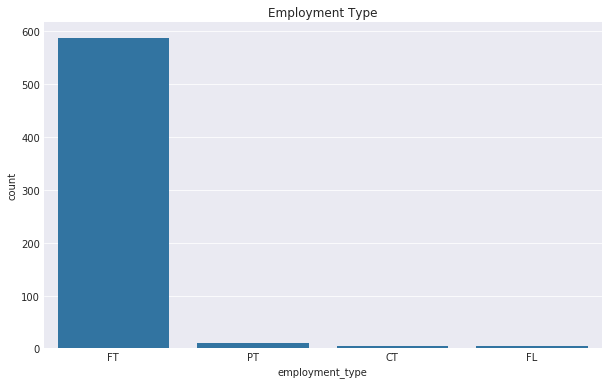

In [83]:
plt.figure(figsize=(10,6))
et_sorted = df["employment_type"].value_counts().index
sns.countplot(data=df, x="employment_type", order=et_sorted, color=base_color)
plt.title("Employment Type");

#### Observation: 
Almost all of the employees are full time workers.

### Visualization 5: Job Title

#### Question:
How many job titles are there and how are they distributed?

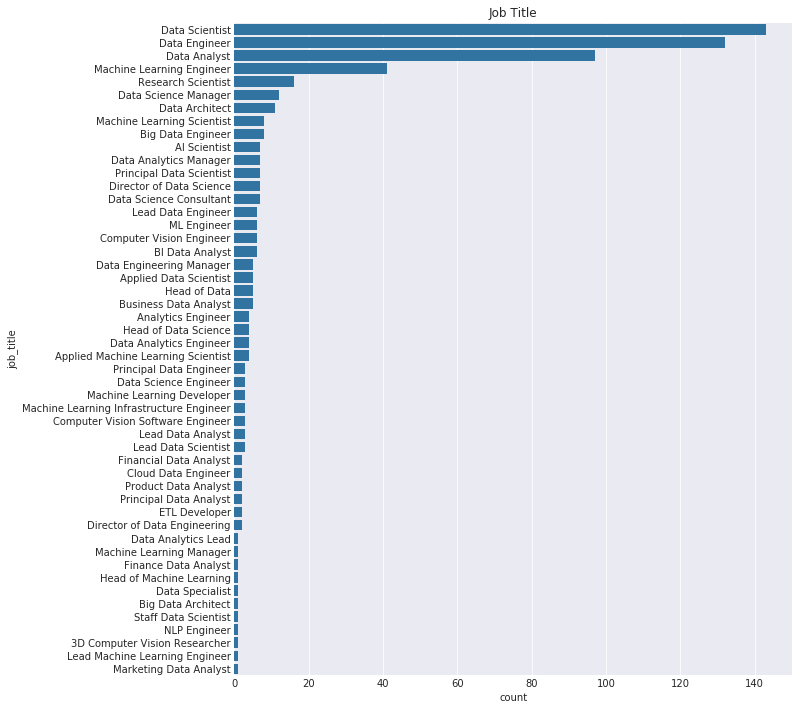

In [101]:
# Show all unique values because I find it interesting to see what kind of titles there are 
plt.figure(figsize=(10,12))
jt_sorted = df["job_title"].value_counts().index
sns.countplot(data=df, y="job_title", order=jt_sorted, color=base_color)
plt.title("Job Title");

#### Observation: 
Data Scientis/Engineer/Analyst are the most common job titles found in the dataset.

### Visualization 6: Company Location

#### Question:
Where are the companies located?

In [91]:
location = df["company_location"].value_counts()
location_subset = location[location > 5].index

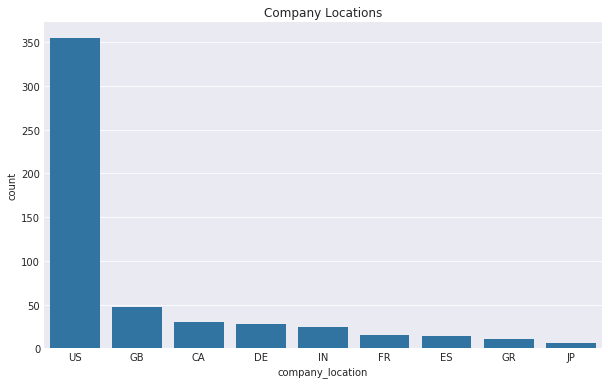

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="company_location", order=location_subset, color=base_color)
plt.title("Company Locations");

#### Observations:
Looks almost identical to the employer residence plot from before which makes sense. Most of the companies are based in the US.

### Visualization 7: Company Size

#### Question: Which company size is the most common?

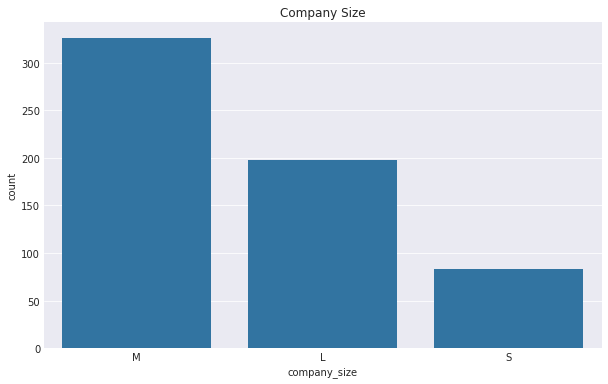

In [99]:
plt.figure(figsize=(10,6))
el_sorted = df["company_size"].value_counts().index
sns.countplot(data=df, x="company_size", order=el_sorted, color=base_color)
plt.title("Company Size");

#### Observations:
Most companies are medium sized, meaning they have between 50-250 employees. Following are large companies which have more than 250 employees.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no transformations made, only some subsetting for values that are have a count larger than 5 to reduce the amount of information shown in the plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the data seems distributed as I expected it to be. The only operations I did was to limit the data shown to reduce overplotting in some cases. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Variable pairs to explore:
1. Salary - Experience Level
2. Salary - Employer Residence
3. Salary - Company Size
4. Experience Level - Company Size
5. Company Location - Company Size
6. Salary - Remote Ratio

In [19]:
# convert experience level and company size into ordered categorical types
ordinal_var_dict = {'experience_level': ['EN', 'MI', 'SE', 'EX'],
                    'company_size': ['S', 'M', 'L']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [20]:
# found here https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings-in-python
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [23]:
base_color = sns.color_palette()[0]

### Visualization 1: Salary - Experience Level

#### Question:
Do Experts earn more than other employees?

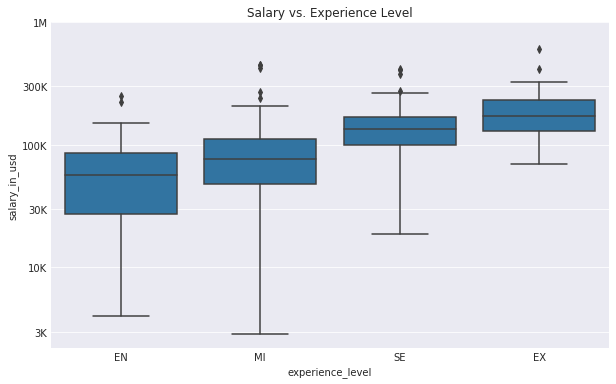

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="experience_level", y="salary_in_usd", color=base_color)
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);
plt.title("Salary vs. Experience Level");

#### Observation: 
Seems like the more experiences a employee has, the more money he earns which makes sense.

### Visualization 2: Salary - Employer Residence

#### Question: 
Does the residence impact the salary?

In [26]:
# Only look at countries which have more than 5 employees
countries = df["employee_residence"].value_counts()
countries_subset = countries[countries > 5].index

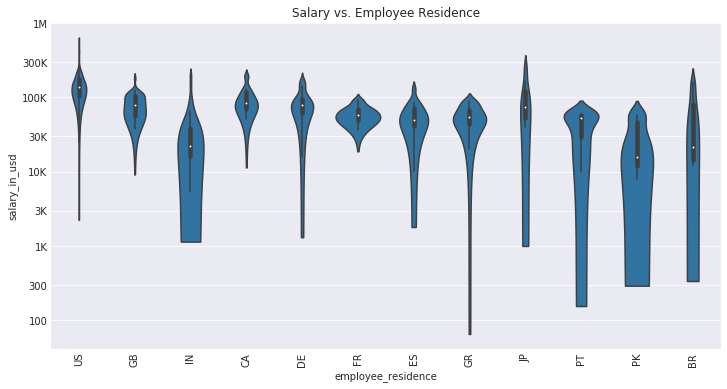

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="employee_residence", y="salary_in_usd", color=base_color, order=countries_subset)
plt.yscale("log")
ticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);
plt.xticks(rotation=90)
plt.title("Salary vs. Employee Residence");

#### Observation: 
Seems like the residence has a rather big impact on salaries.

### Visualization 3: Salary - Company Size

#### Question: 
Do big companies pay more than small companies?

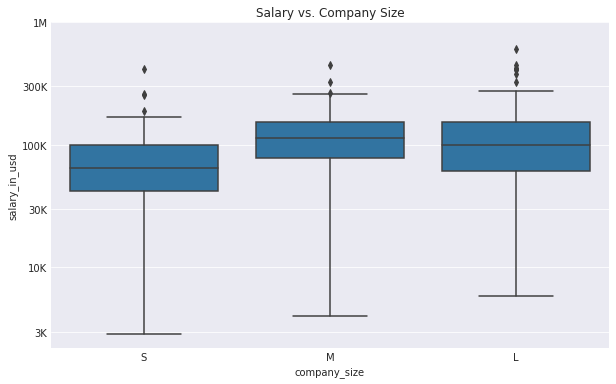

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="company_size", y="salary_in_usd", color=base_color)
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);
plt.title("Salary vs. Company Size");

#### Observation:
Medium companies seems to pay a bit more regarding the median value. Large companies have a wider spread of salaries.

### Visualization 4: Experience Level - Company Size

#### Question: 
Which company size has which kind of employees?

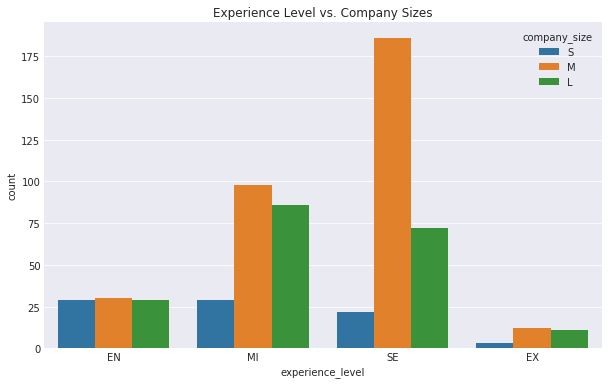

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="experience_level", hue="company_size")
plt.title("Experience Level vs. Company Sizes");

#### Observation: 
It seems that medium sized companies have the most data science employees overall, most of them being in the senior experience level. Large companies have more mid level than senior level employees.

### Visualization 5: Company Location - Company Size

#### Question: 
Which country has what kind of company sizes?

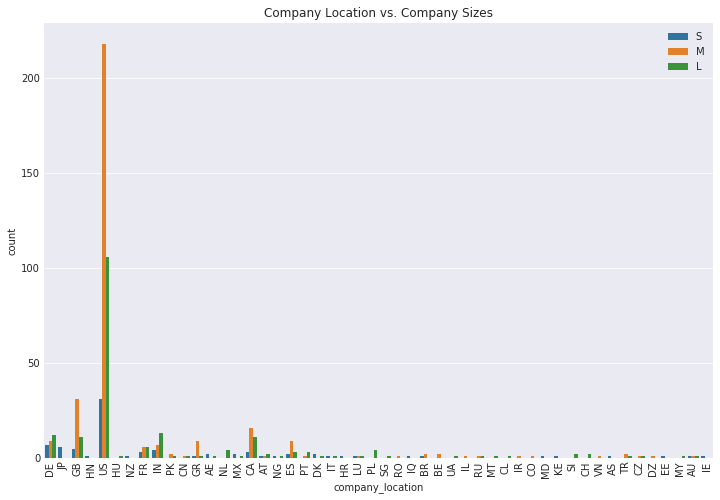

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="company_location", hue="company_size")
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.title("Company Location vs. Company Sizes");

#### Observation:
No surprise here, the US having the most companies overall, with the majority of them being medium sized followed by large companies.

### Visualization 6: Salary - Remote Ratio

#### Question: 
Do remote employees earn less money than employees in the office?

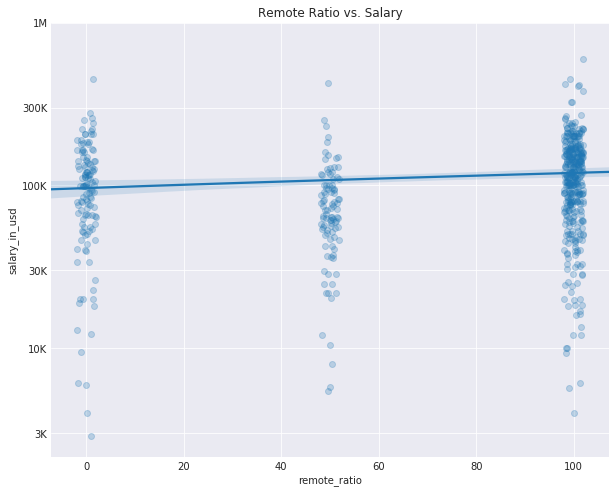

In [31]:
plt.figure(figsize=(10,8))
sns.regplot(data=df, x="remote_ratio", y="salary_in_usd", truncate=False, x_jitter=2, scatter_kws={'alpha':1/4})
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);
plt.title("Remote Ratio vs. Salary");

#### Observation: 
Seems like there is just a small difference in salaries for employees working remote or in the office, trending to paying higher salaries the higher the remote ratio is.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Comparing salary with experience level we could see that more experienced employees earn more money. Another interesting finding is that the remote ratio seems to have no effect on salary.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is very interesting that medium sized companies have the highest amount of senior level employees compared to small and large companies. 

## Multivariate Exploration


Plot 1: Salary - Experience Level - Company Size (Faceting)

Plot 2: Salary - Experience Level - Employer Residence (Faceting)

Plot 3: Salary - Company Size - Company Location (Faceting)

Plot 4: Salary - Remote Ratio - Company Size (Colored Scatter Plot)

### Visualization 1: Salary - Experience Level - Company Size (Faceting)

#### Question: 
How does the company size impact the salary of employees with different experience levels?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


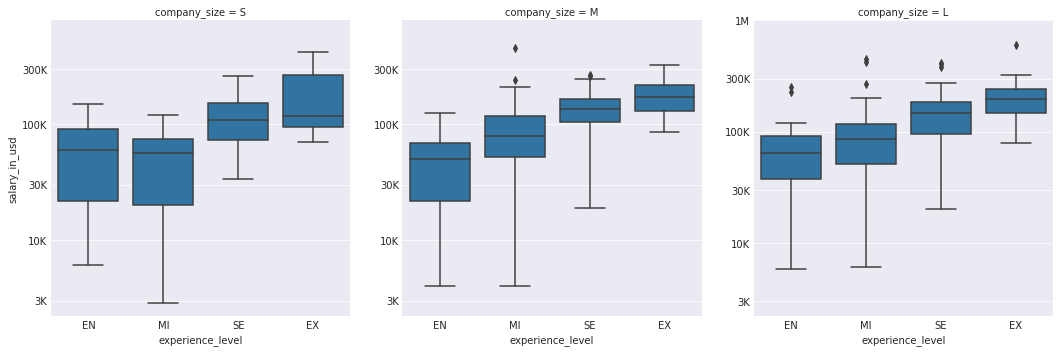

In [32]:
g = sns.FacetGrid(data = df, col = "company_size", size=5)
g.map(sns.boxplot, "experience_level", "salary_in_usd")
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);

#### Observation:
One interesting observation is that "mid level" employees in small companies seems to earn less salary than "entry level" employees in small companies, also they have a bigger spread. Otherwise it´s pretty much as expected.

### Visualization 2: Salary - Experience Level - Employer Residence (Faceting)

#### Question: 
How does the residence impact the salary of employees with different experience levels?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


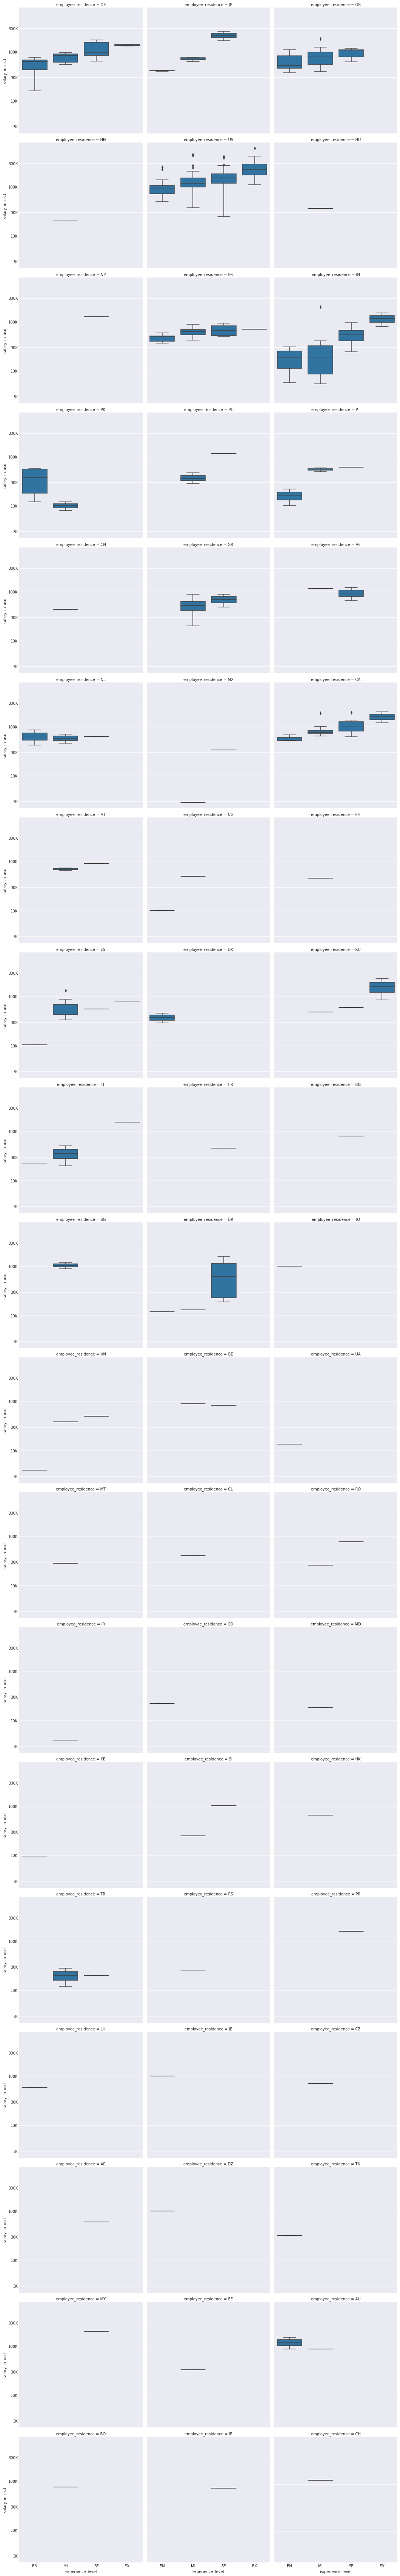

In [33]:
g = sns.FacetGrid(data = df, col = "employee_residence", col_wrap = 3, size=5)
g.map(sns.boxplot, "experience_level", "salary_in_usd")
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);

#### Observation:
There are a lot of plots with little to no data points, showing almost no information. Most of the countries with enough data show an uptrending plot, meaning a higher salary for more experienced employees. There are also some outliers like Pakistan (PK) showing a negative trend.

### Visualiaztion 3: Salary - Company Size - Company Location (Faceting)

#### Question: 
How does the company size and location impact the salary?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


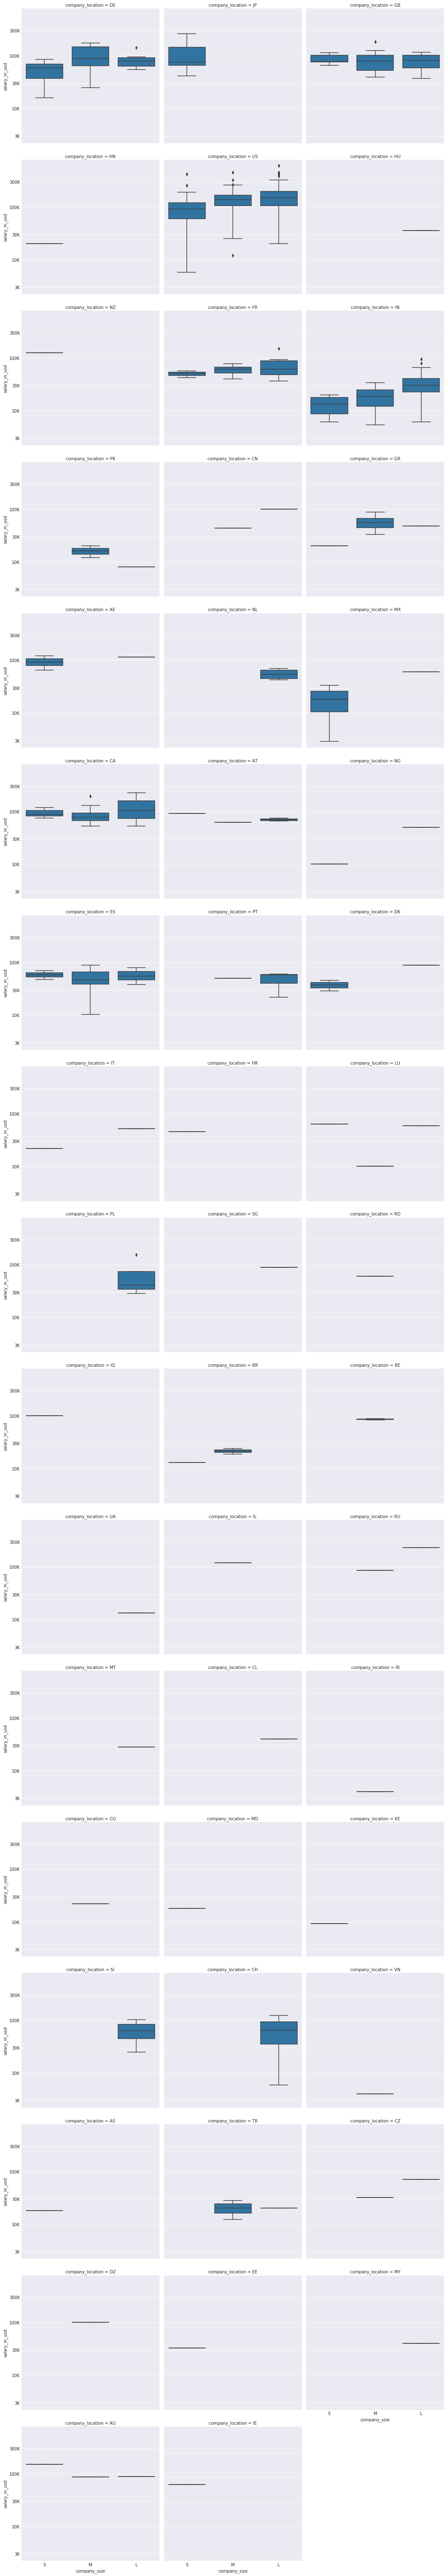

In [34]:
g = sns.FacetGrid(data = df, col = "company_location", col_wrap = 3, size=5)
g.map(sns.boxplot, "company_size", "salary_in_usd")
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);

#### Observation:
Most of the countries with enough data points show a slight updwards trend between small, medium and large companies. There are also some countries like Germany which show a higher salary for medium sized companies than large companies. Countrie like Great Britain show an almost identical salary across the board. 

### Visualization 4: Salary - Remote Ratio - Company Size (Colored Scatter Plot)

#### Question: 
How does the company size and the remore ratio impact the salary?

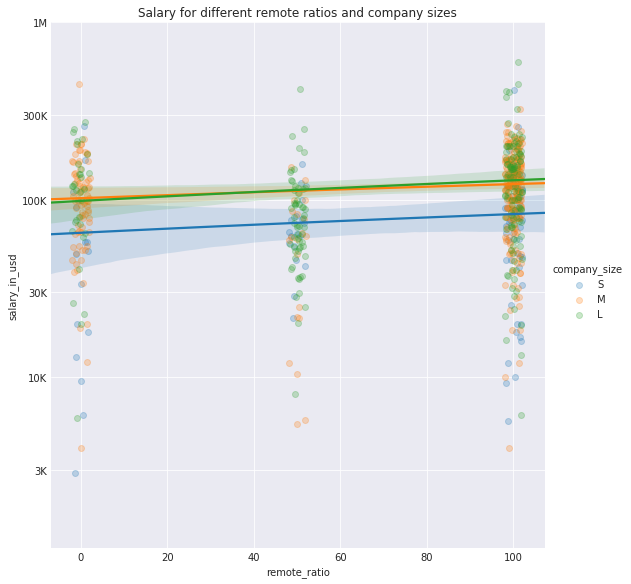

In [35]:
g = sns.FacetGrid(data = df, hue = "company_size", size=8)
g.map(sns.regplot, "remote_ratio", "salary_in_usd", truncate=False, x_jitter=2, scatter_kws={'alpha':1/4})
g.add_legend()
plt.title("Salary for different remote ratios and company sizes")
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);

#### Observation: 
All company sizes show a positive trend line, with medium and large companies being almost exactly the same.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Salary and experience level still share a strong relationship, even with an added variable such as company size or employee residence. The more experienced an employee is, the more money he will earn on average. 

### Were there any interesting or surprising interactions between features?

> Yes, it´s interesting that medium and large companies are ofte times very close in the salaries shown. 

## Conclusions
The exploration started with having a brief look at the data, if there are some missing values and the different data types. Following I had a look at some of the "key features" using univariate plots, like bar and hist plots. Most of the plots showed expected results, but for example "salary" was right skewed because of some very high salaries found in the data. Next up I had a look at some bivariate plots, comparing different pairs of variables with each other. I tried incorporating different plot types, like box/violin/scatter/count-plots depending on which kind of variable was used (num/cat). The main take away here was that more experienced employees in medium and large companies earn the highest salary. In the final stage I had a look a few different multivariate plots, building up on the findings from the bivariate plot stage in adding an additional variable. The plots showed that "salary" and "experience level" still share a strong relationship, even with an added variable such as company size or employee residence.
